In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pd.set_option('display.width', 1000)

In [12]:
# load iris data set
iris = load_iris()
X = iris.data #150*4 data matrix
y = iris.target #target variables, corresponding to three different iris flower varieties

print("original data matrix(X):")
print(pd.DataFrame(X, columns=iris.feature_names))

original data matrix(X):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [13]:
# data standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

print("\n data matrix after data standardized(X_standardized):")
print(pd.DataFrame(X_standardized, columns = iris.feature_names))


 data matrix after data standardized(X_standardized):
     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0            -0.900681          1.019004          -1.340227         -1.315444
1            -1.143017         -0.131979          -1.340227         -1.315444
2            -1.385353          0.328414          -1.397064         -1.315444
3            -1.506521          0.098217          -1.283389         -1.315444
4            -1.021849          1.249201          -1.340227         -1.315444
..                 ...               ...                ...               ...
145           1.038005         -0.131979           0.819596          1.448832
146           0.553333         -1.282963           0.705921          0.922303
147           0.795669         -0.131979           0.819596          1.053935
148           0.432165          0.788808           0.933271          1.448832
149           0.068662         -0.131979           0.762758          0.790671

[150 row

In [14]:
# calculate covariance matrix
cov_matrix = np.cov(X_standardized.T)

print("\n covariance matrix(cov_matrix):")
print(pd.DataFrame(cov_matrix, index = iris.feature_names, columns = iris.feature_names))


 covariance matrix(cov_matrix):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           1.006711         -0.118359           0.877604          0.823431
sepal width (cm)           -0.118359          1.006711          -0.431316         -0.368583
petal length (cm)           0.877604         -0.431316           1.006711          0.969328
petal width (cm)            0.823431         -0.368583           0.969328          1.006711


In [15]:
# calculate eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

print("\n eigenvalues(Eigenvalues):")
print(eigenvalues)

print("\n eigenvectors(Eigenvectors):")
print(pd.DataFrame(eigenvectors, columns = iris.feature_names, index = iris.feature_names))


 eigenvalues(Eigenvalues):
[2.93808505 0.9201649  0.14774182 0.02085386]

 eigenvectors(Eigenvectors):
                   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
sepal length (cm)           0.521066         -0.377418          -0.719566          0.261286
sepal width (cm)           -0.269347         -0.923296           0.244382         -0.123510
petal length (cm)           0.580413         -0.024492           0.142126         -0.801449
petal width (cm)            0.564857         -0.066942           0.634273          0.523597


In [16]:
# select principal components-sort by eigenvalues in descending order
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

print("\n eigenvalues after sorting(Sorted Eigenvalues):")
print(eigenvalues)

print("\n eigenvectors after sorting(Sorted Eigenvectors):")
print(pd.DataFrame(eigenvectors, columns = [f"PC{i+1}" for i in range(len(eigenvalues))], index = iris.feature_names))


 eigenvalues after sorting(Sorted Eigenvalues):
[2.93808505 0.9201649  0.14774182 0.02085386]

 eigenvectors after sorting(Sorted Eigenvectors):
                        PC1       PC2       PC3       PC4
sepal length (cm)  0.521066 -0.377418 -0.719566  0.261286
sepal width (cm)  -0.269347 -0.923296  0.244382 -0.123510
petal length (cm)  0.580413 -0.024492  0.142126 -0.801449
petal width (cm)   0.564857 -0.066942  0.634273  0.523597


In [17]:
# project data into the principal component space
W = eigenvectors[:, :2]

print("\n transformation matrix(W):")
print(pd.DataFrame(W, columns = ["PC1", "PC2"], index = iris.feature_names))

X_pca = X_standardized.dot(W)

print("\n data after dimensionality reducing(X_pca):")
print(pd.DataFrame(X_pca, columns = ["PC1", "PC2"]))


 transformation matrix(W):
                        PC1       PC2
sepal length (cm)  0.521066 -0.377418
sepal width (cm)  -0.269347 -0.923296
petal length (cm)  0.580413 -0.024492
petal width (cm)   0.564857 -0.066942

 data after dimensionality reducing(X_pca):
          PC1       PC2
0   -2.264703 -0.480027
1   -2.080961  0.674134
2   -2.364229  0.341908
3   -2.299384  0.597395
4   -2.389842 -0.646835
..        ...       ...
145  1.870503 -0.386966
146  1.564580  0.896687
147  1.521170 -0.269069
148  1.372788 -1.011254
149  0.960656  0.024332

[150 rows x 2 columns]


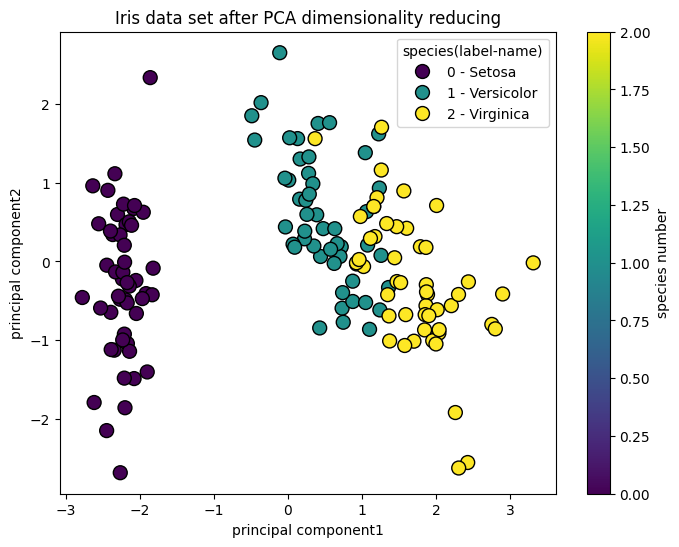

In [18]:
# visualization
plt.figure(figsize = (8,6))

#plt.subplot(1, 2, 1)
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c = y, cmap = 'viridis', edgecolor = 'k', s = 100)

class_labels = ["Setosa", "Versicolor", "Virginica"]

handles = []
for i in range(len(class_labels)):
    handles.append(plt.Line2D([0], [0], marker = "o", color = "w", label = f"{i} - {class_labels[i]}",
                             markerfacecolor = plt.cm.viridis(i / 2), markersize = 10, markeredgecolor = "k"))

plt.legend(handles = handles, title = "species(label-name)")
plt.xlabel("principal component1")
plt.ylabel("principal component2")
plt.title("Iris data set after PCA dimensionality reducing")
plt.colorbar(scatter, label = "species number")


# # plot a scatter plot of the raw data
# plt.subplot(1, 2, 2)
# plt.scatter(X[:, 0], X[:, 2], c = y, cmap = "viridis", edgecolor = "k", s = 100)
# plt.xlabel("sepal length (sepal length)")
# plt.ylabel("petal length (petal length)")
# plt.title("Iris data set raw data")

# plt.tight_layout()
plt.show()

In [19]:
# LDA

the accuracy of LDA dimensionality reduction: 0.98


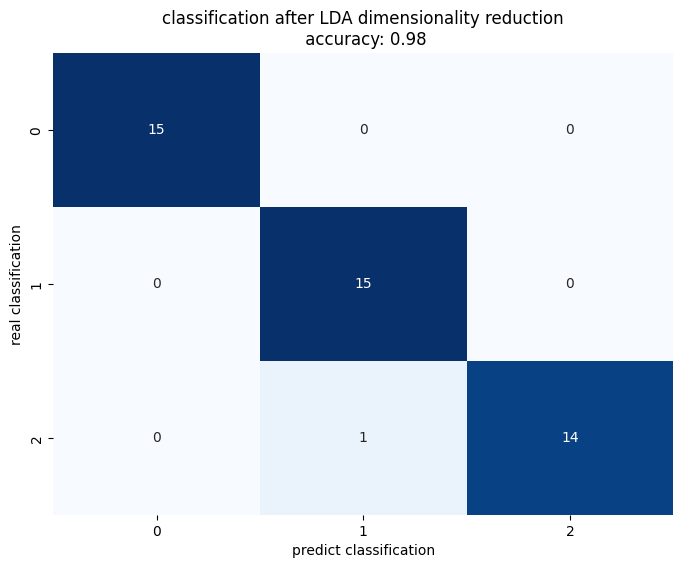

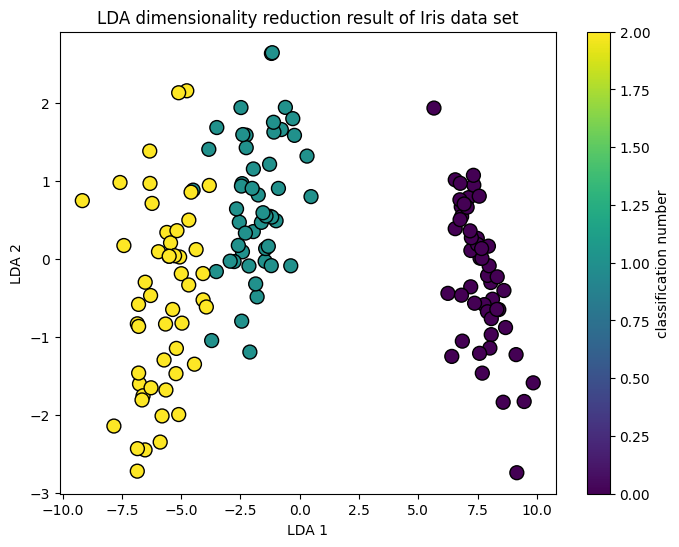

In [20]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# load iris data set
iris = datasets.load_iris()
X = iris.data
y = iris.target

# data standardization
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# LDA dimensionality reduction
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_standardized, y)

# divide data set
X_train, X_test, y_train, y_test = train_test_split(X_lda, y, test_size=0.3, random_state=42, stratify=y)

# SVM for classification
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

# eveluation of classfication effect
accuracy = accuracy_score(y_test, y_pred)
print(f"the accuracy of LDA dimensionality reduction: {accuracy:.2f}")

# plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title(f"classification after LDA dimensionality reduction\n accuracy: {accuracy:.2f}")
plt.xlabel("predict classification")
plt.ylabel("real classification")
plt.show()

# visualization
plt.figure(figsize=(8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)
plt.xlabel("LDA 1")
plt.ylabel("LDA 2")
plt.title("LDA dimensionality reduction result of Iris data set")
plt.colorbar(label='classification number')
plt.show()
